In [29]:
import zipfile
import pandas as pd

# Specify the ZIP file path
zip_file_path = "/workspaces/Data-Science-Projects/CausalML/healthcareml/diabetes+130-us+hospitals+for+years+1999-2008.zip"

# Specify the target file you want to load
target_file = "diabetic_data.csv"

# Open the ZIP file and extract the target file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Check the list of files in the ZIP
    print("Files in ZIP:", zip_ref.namelist())
    
    # Extract and load the target file
    with zip_ref.open(target_file) as file:
        data = pd.read_csv(file)

# Check the loaded data
print(data.head())


Files in ZIP: ['diabetic_data.csv', 'IDS_mapping.csv']


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [2]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
selected_columns = ['race', 'gender', 'age', 'admission_type_id', 
                    'time_in_hospital', 'num_lab_procedures', 
                    'num_medications', 'number_diagnoses', 
                    'change', 'diabetesMed', 'readmitted']
for i in data[selected_columns]:
    print(data.value_counts())

encounter_id  patient_nbr  race             gender  age      weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
434900486     126428594    AfricanAmerican  Male    [40-50)  ?       6                  7                         7                    2                 ?           InternalMedicine   60                  0               4                0                  0            

In [30]:
# %%
# Focus on selected features
data = data[selected_columns]

# Remove rows with invalid or unknown values
data = data[~data['race'].isin(['?'])]
data = data[~data['gender'].isin(['Unknown/Invalid'])]

# Binary encoding for treatment and outcome
data['diabetesMed_binary'] = (data['diabetesMed'] == 'Yes').astype(int)
data['readmitted_binary'] = (data['readmitted'] != 'NO').astype(int)

# Encode categorical variables using one-hot encoding
categorical_columns = ['gender', 'race', 'age', 'admission_type_id', 
                       'time_in_hospital', 'num_lab_procedures', 
                       'num_medications', 'number_diagnoses', 'change']

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, 
                               columns=categorical_columns, 
                               drop_first=True)

# Check the encoded data
print(data_encoded.head())

  diabetesMed readmitted  diabetesMed_binary  readmitted_binary  gender_Male  \
0          No         NO                   0                  0        False   
1         Yes        >30                   1                  1        False   
2         Yes         NO                   1                  0        False   
3         Yes         NO                   1                  0         True   
4         Yes         NO                   1                  0         True   

   race_Asian  race_Caucasian  race_Hispanic  race_Other  age_[10-20)  ...  \
0       False            True          False       False        False  ...   
1       False            True          False       False         True  ...   
2       False           False          False       False        False  ...   
3       False            True          False       False        False  ...   
4       False            True          False       False        False  ...   

   number_diagnoses_8  number_diagnoses_9  number_

In [5]:
data_encoded = data_encoded.drop(["diabetesMed", "readmitted"], axis=1)

In [6]:
data_encoded.columns

Index(['diabetesMed_binary', 'readmitted_binary', 'gender_Male', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)',
       ...
       'number_diagnoses_8', 'number_diagnoses_9', 'number_diagnoses_10',
       'number_diagnoses_11', 'number_diagnoses_12', 'number_diagnoses_13',
       'number_diagnoses_14', 'number_diagnoses_15', 'number_diagnoses_16',
       'change_No'],
      dtype='object', length=243)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


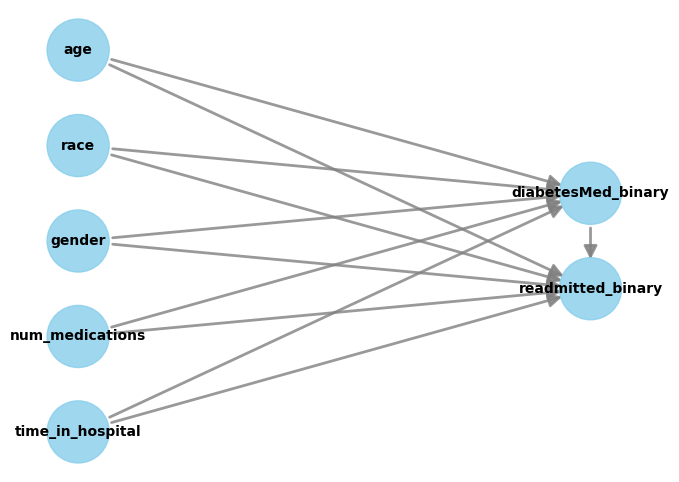

In [7]:
from dowhy import CausalModel

# Define the dataset structure
model = CausalModel(
    data=data,
    treatment="diabetesMed_binary",  # Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"]
)

# Visualize the DAG
model.view_model()


In [75]:
# %%
# Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/graph.py:432: SyntaxWarning: invalid escape sequence '\s'
  elif re.match(".*graph\s*\[.*\]\s*", graph_str):


NetworkXError: graph should be directed acyclic

In [10]:
# %%
# Estimate the causal effect
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)
print(f"Causal Effect Estimate: {estimate.value}")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Causal Effect Estimate: 0.060175692517991396


In [11]:
# Refute the estimate
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.060175692517991396
New effect:0.00017619507096047906
p value:0.94



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split data
X = data_encoded.drop(columns=['readmitted_binary'])
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.5552540328659732
F1 Score: 0.4785529106764082


In [13]:
import shap

# # Initialize SHAP explainer
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_test)

# # Summary plot
# shap.summary_plot(shap_values, X_test)


In [14]:
# Estimate using linear regression
estimate_lr = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print(f"Linear Regression Estimate: {estimate_lr.value}")


Linear Regression Estimate: 0.06880874866015563


/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [15]:
# Estimate using inverse propensity weighting
estimate_ipw = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting"
)
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Inverse Propensity Weighting Estimate: 0.062490758163096405


In [16]:
# Summarize results
print(f"Propensity Score Matching Estimate: {estimate.value}")
print(f"Linear Regression Estimate: {estimate_lr.value}")
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Propensity Score Matching Estimate: 0.060175692517991396
Linear Regression Estimate: 0.06880874866015563
Inverse Propensity Weighting Estimate: 0.062490758163096405


In [17]:
output_file_path = "/workspaces/Data-Science-Projects/CausalML/healthcareml/X.csv"
X.to_csv(output_file_path, index=False)

In [18]:
import re
X.columns = [re.sub(r'[()\[\]<>\s]', '', col) for col in X.columns]
X.columns

Index(['diabetesMed_binary', 'gender_Male', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'age_10-20', 'age_20-30', 'age_30-40',
       'age_40-50',
       ...
       'number_diagnoses_8', 'number_diagnoses_9', 'number_diagnoses_10',
       'number_diagnoses_11', 'number_diagnoses_12', 'number_diagnoses_13',
       'number_diagnoses_14', 'number_diagnoses_15', 'number_diagnoses_16',
       'change_No'],
      dtype='object', length=242)

In [19]:
# Remove square brackets, parentheses, and replace hyphens with underscores

X.columns = [col.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace('-', '_') for col in X.columns]
X

,diabetesMed_binary,gender_Male,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_10_20,age_20_30,age_30_40,age_40_50,...,number_diagnoses_8,number_diagnoses_9,number_diagnoses_10,number_diagnoses_11,number_diagnoses_12,number_diagnoses_13,number_diagnoses_14,number_diagnoses_15,number_diagnoses_16,change_No
0,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
101762,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
101763,1,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
101764,1,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [20]:
X = data_encoded.drop(columns=['readmitted_binary'])

In [21]:
import re
import csv

file_path = '/workspaces/Data-Science-Projects/CausalML/healthcareml/X.csv'
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    first_line = next(reader)  # Reads the first line

# Clean the column names using regex
def clean_column_name(col_name):
    # Remove any character that isn't a letter, number, or underscore
    col_name = re.sub(r'[^0-9a-zA-Z_]', '', col_name)  
    # Ensure the name starts with a letter or underscore
    if col_name[0].isdigit():
        col_name = '_' + col_name
    return col_name

# Apply cleaning to all columns
cleaned_columns = [clean_column_name(col) for col in first_line]

# Print cleaned columns
print(cleaned_columns)

X.columns = cleaned_columns

# Verify the new column names
print(X.columns)

['diabetesMed_binary', 'gender_Male', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_1020', 'age_2030', 'age_3040', 'age_4050', 'age_5060', 'age_6070', 'age_7080', 'age_8090', 'age_90100', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6', 'admission_type_id_7', 'admission_type_id_8', 'time_in_hospital_2', 'time_in_hospital_3', 'time_in_hospital_4', 'time_in_hospital_5', 'time_in_hospital_6', 'time_in_hospital_7', 'time_in_hospital_8', 'time_in_hospital_9', 'time_in_hospital_10', 'time_in_hospital_11', 'time_in_hospital_12', 'time_in_hospital_13', 'time_in_hospital_14', 'num_lab_procedures_2', 'num_lab_procedures_3', 'num_lab_procedures_4', 'num_lab_procedures_5', 'num_lab_procedures_6', 'num_lab_procedures_7', 'num_lab_procedures_8', 'num_lab_procedures_9', 'num_lab_procedures_10', 'num_lab_procedures_11', 'num_lab_procedures_12', 'num_lab_procedures_13', 'num_lab_procedures_14', 'num_lab_procedures_1

In [22]:
X.head()

,diabetesMed_binary,gender_Male,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_1020,age_2030,age_3040,age_4050,...,number_diagnoses_8,number_diagnoses_9,number_diagnoses_10,number_diagnoses_11,number_diagnoses_12,number_diagnoses_13,number_diagnoses_14,number_diagnoses_15,number_diagnoses_16,change_No
0,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42)
X = X
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5712849891954369
XGBoost F1 Score: 0.5097971614089525


In [24]:
print(model._data.keys())  # To see the available keys

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_medications', 'number_diagnoses', 'change',
       'diabetesMed', 'readmitted', 'diabetesMed_binary', 'readmitted_binary',
       'propensity_score', 'ips_weight', 'tips_weight', 'cips_weight',
       'ips_normalized_weight', 'tips_normalized_weight',
       'cips_normalized_weight', 'ips_stabilized_weight',
       'tips_stabilized_weight', 'cips_stabilized_weight', 'd_y', 'dbar_y'],
      dtype='object')


In [25]:
# Add causal features to the dataset
X_train['causal_feature'] = model._data['propensity_score'][:len(X_train)]
X_test['causal_feature'] = model._data['propensity_score'][len(X_train):]

# Retrain with causal features
xgb_causal = XGBClassifier(random_state=42)
xgb_causal.fit(X_train, y_train)
y_pred_xgb_causal = xgb_causal.predict(X_test)

# Evaluate the model
print("XGBoost with Causal Features - Accuracy:", accuracy_score(y_test, y_pred_xgb_causal))
print("XGBoost with Causal Features - F1 Score:", f1_score(y_test, y_pred_xgb_causal))


XGBoost with Causal Features - Accuracy: 0.5284185134931404
XGBoost with Causal Features - F1 Score: 0.2861706983112734


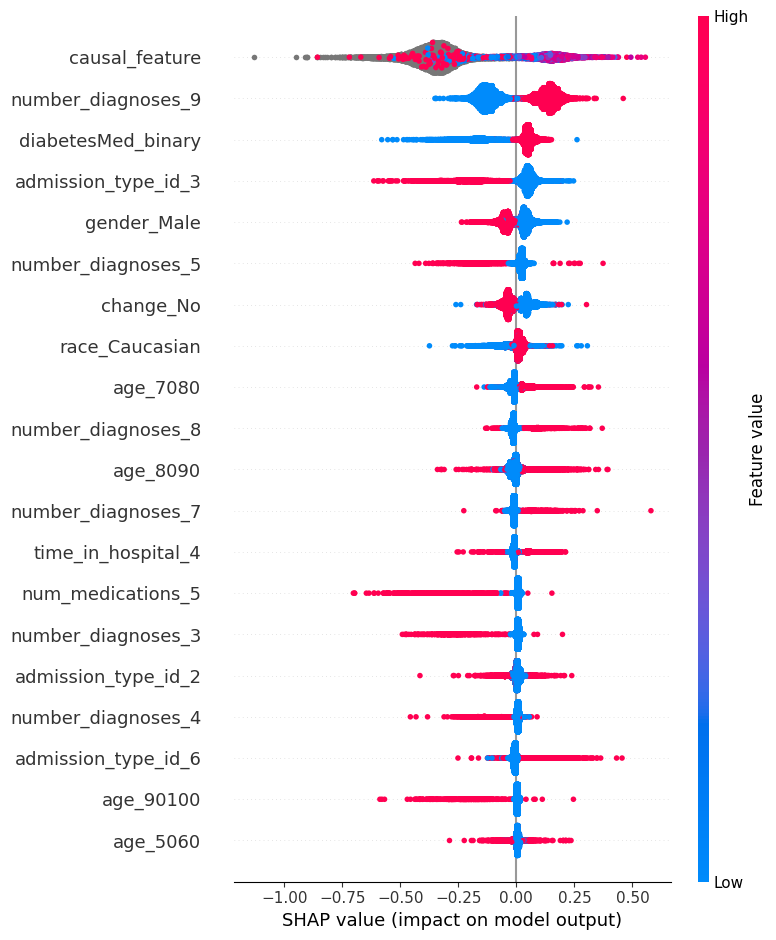

In [26]:

# Initialize SHAP for the XGBoost model with causal features
explainer_causal = shap.TreeExplainer(xgb_causal)
shap_values_causal = explainer_causal.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values_causal, X_test)


In [28]:
data.isna.count()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [59]:
df = data

In [60]:
# List of columns to convert to numeric values
columns_to_convert = [
    'race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
    'num_lab_procedures', 'num_medications', 'number_diagnoses', 'change', 'diabetesMed_binary', 'readmitted_binary'
]

# Function to convert columns to numeric values based on unique values
def convert_to_numeric(df, columns):
    for column in columns:
        if df[column].dtype == 'object':  # Check if column is categorical
            unique_values = df[column].unique()
            value_mapping = {value: idx for idx, value in enumerate(unique_values)}
            df[column] = df[column].map(value_mapping)
    return df

# Apply conversion to numeric values
df = convert_to_numeric(df, columns_to_convert)
df = df.drop(["diabetesMed", "readmitted"], axis=1)
# Now the DataFrame 'df' will have the categorical columns converted to numeric values
print(df.head())


   race  gender  age  admission_type_id  time_in_hospital  num_lab_procedures  \
0     0       0    0                  6                 1                  41   
1     0       0    1                  1                 3                  59   
2     1       0    2                  1                 2                  11   
3     0       1    3                  1                 2                  44   
4     0       1    4                  1                 1                  51   

   num_medications  number_diagnoses  change  diabetesMed_binary  \
0                1                 1       0                   0   
1               18                 9       1                   1   
2               13                 6       0                   1   
3               16                 7       1                   1   
4                8                 5       1                   1   

   readmitted_binary  
0                  0  
1                  1  
2                  0  
3           

Depth=7, working on node 10: 100%|██████████| 11/11 [00:00<00:00, 909.33it/s] 


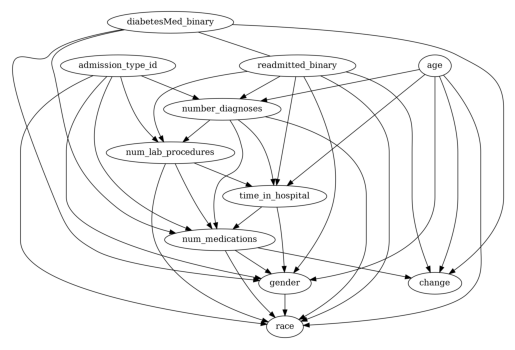

In [61]:
from causallearn.search.ConstraintBased.PC import pc

labels = [f'{col}' for i, col in enumerate(df.columns)]
df = df.to_numpy()

cg = pc(df)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/causal_model.py:583: UserWarning: 9 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


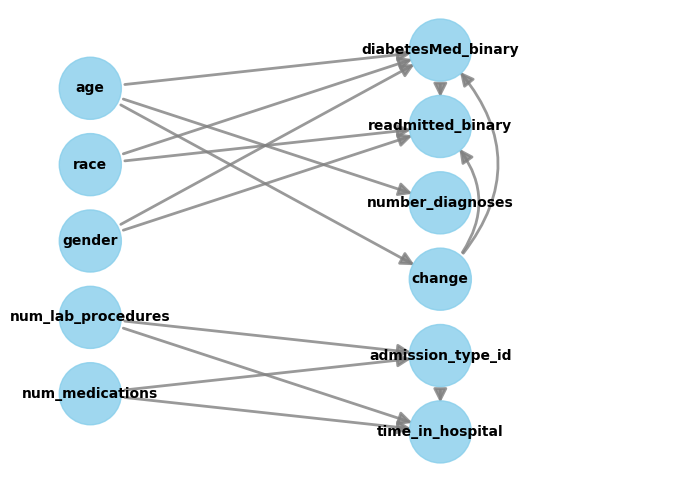

In [97]:
from dowhy import CausalModel
# Define the causal graph as a string, ensuring it connects treatment, outcome, and common causes
graph = """
digraph {
    {}
}
""".format(graph_string)

# Define the causal model with the dataset and the causal graph
model_pc = CausalModel(
    data=data_encoded,
    treatment="diabetesMed_binary",  # Treatment variable: Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome variable: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"],  # Confounders
    graph=graph  # Provide the causal graph structure
)

# Visualize the causal graph
model_pc.view_model()

In [ ]:
from causallearn.search.FCMBased import lingam
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)

In [100]:
from causallearn.search.FCMBased.lingam.utils import make_dot

# Fit the model
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)

# Extract the adjacency matrix from the fitted model
adjacency_matrix = model_lingam.adjacency_matrix_

# Create an empty string for the graph
graph_string = ""

# Iterate over the adjacency matrix and convert it to a graph string
for i, row in enumerate(adjacency_matrix):
    for j, value in enumerate(row):
        if value != 0:  # If there's a relationship (non-zero value)
            # Add the edge to the graph string
            graph_string += f"{labels[i]} -> {labels[j]};\n"

# Print the graph string
print(graph_string)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


gender -> race;
gender -> diabetesMed;
age -> race;
age -> gender;
age -> diabetesMed_binary;
admission_type_id -> race;
admission_type_id -> gender;
admission_type_id -> diabetesMed;
time_in_hospital -> gender;
time_in_hospital -> age;
time_in_hospital -> diabetesMed;
num_lab_procedures -> race;
num_lab_procedures -> age;
num_lab_procedures -> admission_type_id;
num_lab_procedures -> time_in_hospital;
num_lab_procedures -> number_diagnoses;
num_lab_procedures -> change;
num_lab_procedures -> diabetesMed_binary;
num_medications -> race;
num_medications -> gender;
num_medications -> age;
num_medications -> admission_type_id;
num_medications -> time_in_hospital;
num_medications -> num_lab_procedures;
num_medications -> number_diagnoses;
num_medications -> change;
num_medications -> diabetesMed_binary;
number_diagnoses -> race;
number_diagnoses -> gender;
number_diagnoses -> age;
number_diagnoses -> admission_type_id;
number_diagnoses -> time_in_hospital;
number_diagnoses -> diabetesMed_b

/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/causal_model.py:583: UserWarning: 9 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


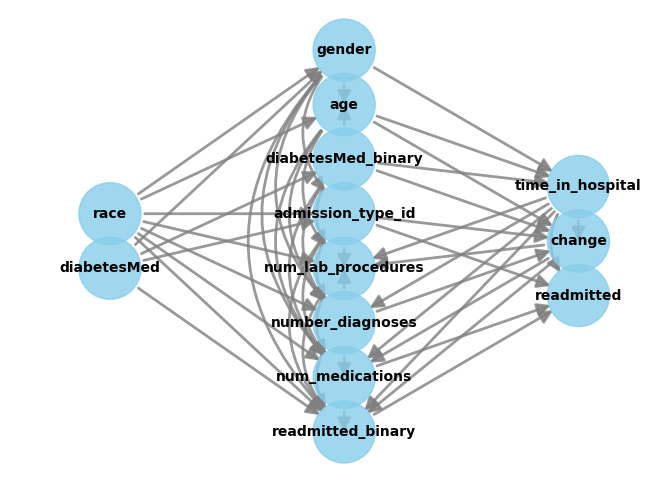

In [ ]:
from dowhy import CausalModel
# Define the causal graph as a string, ensuring it connects treatment, outcome, and common causes


# Define the causal model with the dataset and the causal graph
model_lingam = CausalModel(
    data=data_encoded,
    treatment="diabetesMed_binary",  # Treatment variable: Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome variable: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"],  # Confounders
    graph=graph  # Provide the causal graph structure
)

# Visualize the causal graph
model_lingam.view_model()

In [86]:
labels = data.columns.tolist()
labels

['race',
 'gender',
 'age',
 'admission_type_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'readmitted',
 'diabetesMed_binary',
 'readmitted_binary']

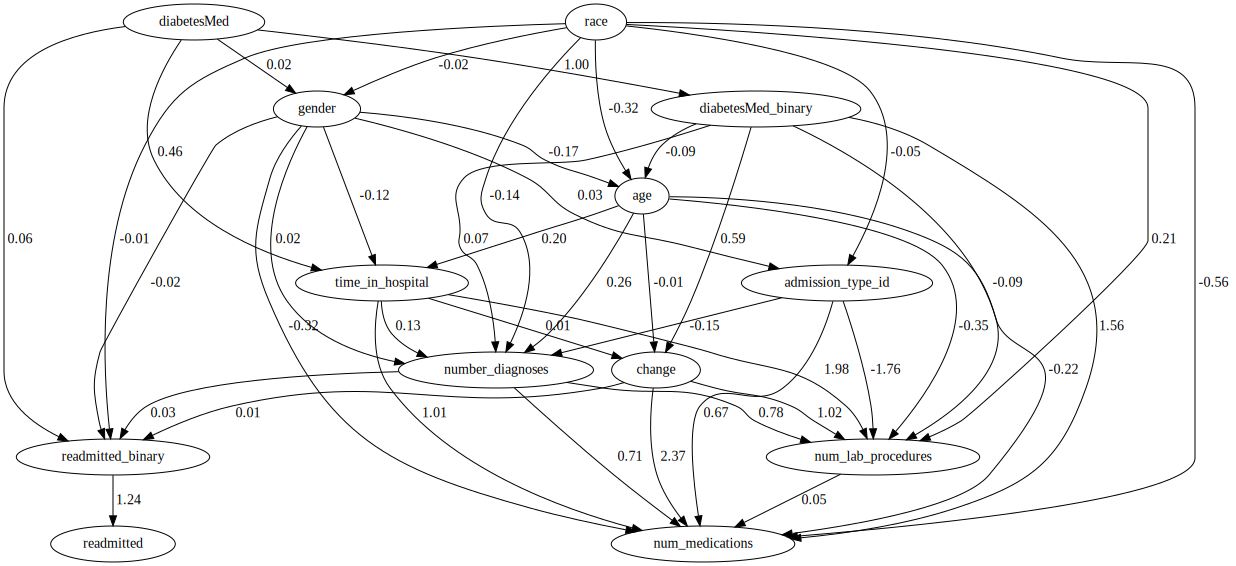

In [88]:
from causallearn.search.FCMBased.lingam.utils import make_dot
make_dot(model_lingam.adjacency_matrix_, labels=labels)

In [99]:
graph_string = ""
make_dot(model_lingam.adjacency_matrix_, labels=labels, graph=graph_string)

TypeError: make_dot() got an unexpected keyword argument 'graph'

In [95]:
# Identify confounders using backdoor criterion
identified_estimand = model_pc.identify_effect()
print("Identified Estimand:")
print(identified_estimand)

NetworkXError: graph should be directed acyclic